In [34]:
# 利用Python的numPy实现PCA
# PCA的基本步骤（将n维数据降到d维）
# 1.均值化：X-M，将所有数据点移动到原点周围
# 2.求总体自相关矩阵R
# 3.求R的特征值，从大到小排序
# 4.选前d个特征值（对数据特征影响最大的d个特征），求对应的特征向量
# 5.利用特征向量组成的矩阵对原数据进行变换，得到的新向量即为降维后的特征

In [35]:
import numpy as np

In [36]:
# 加载数据
def loadDataSet(fileName,splitNode='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(splitNode) for line in fr.readlines()]
    floatArr = []
    for line in stringArr:
        lineArr = [float(i) for i in line]
        floatArr.append(lineArr)
    return np.mat(floatArr)

In [42]:
# pca过程
def pca(dataSet,topN=99999):
    # 1.均值化,按列取均值
    meanVal = np.mean(dataSet,axis=0)
    meanData = (dataSet - meanVal).T
    # 2.求总体自相关矩阵
    covMat = np.mat(np.cov(meanData))
    # 3.求自相关矩阵特征值,及特征向量
    eigVals,eigVects = np.linalg.eig(covMat)
    # 4.按特征值从大到小排序,eigValIndex包含每个特征值的排名
    eigValIndex = np.argsort(eigVals)
    eigValIndex = eigValIndex[:-(topN+1):-1]
    # 逆序输出topN个
    # 特征向量组成对应的变换矩阵
    changeVect = eigVects[:,eigValIndex]
    # 5.对原变量进行变换(注意要加回均值) 
    MeanDomainChange = changeVect.T * meanData
    reconMat = MeanDomainChange.T + meanVal * changeVect 
    shadow = (MeanDomainChange.T * changeVect.T) + meanVal
    return shadow, reconMat

In [51]:
# 绘制图形
import matplotlib.pyplot as plt
def main():
    dataSet = loadDataSet('dataSet.txt')
    shadow,reconMat = pca(dataSet,1)
    fig = plt.figure()
    plt.scatter(dataSet[:,0].flatten().A[0],dataSet[:,1].flatten().A[0],marker='^',s=90)
    plt.scatter(shadow[:,0].flatten().A[0],shadow[:,1].flatten().A[0],marker='o',s=10)

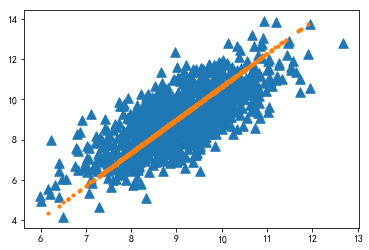

In [52]:
main()